In [1]:
# Instalación de bibliotecas
!pip install pandas matplotlib seaborn

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar los datos
data = pd.read_csv('Mall_Customers.csv') 

Primeras filas del dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Resumen estadístico:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


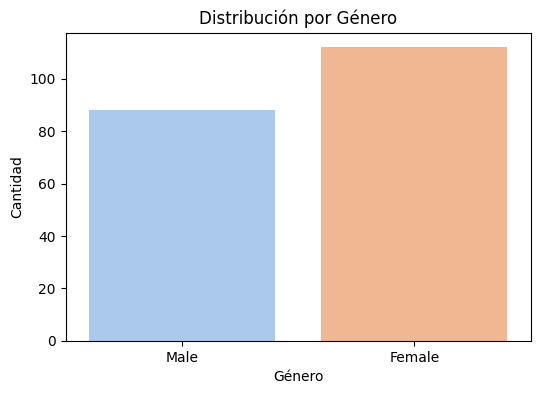

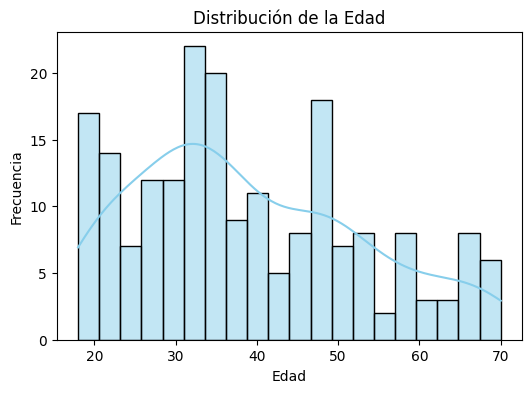

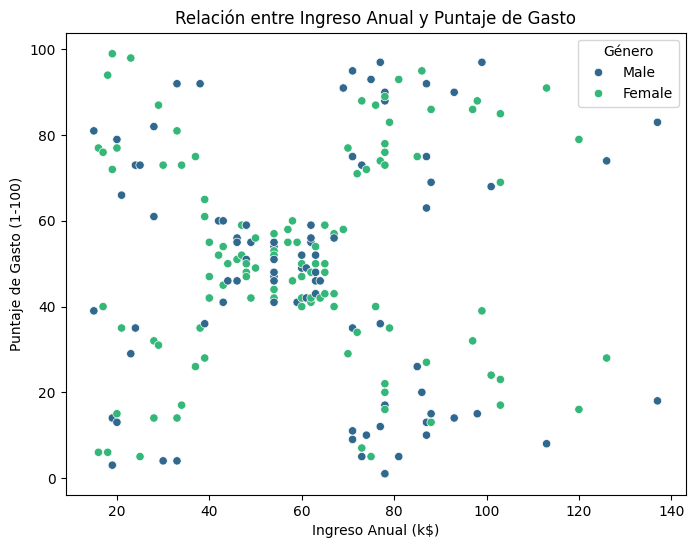

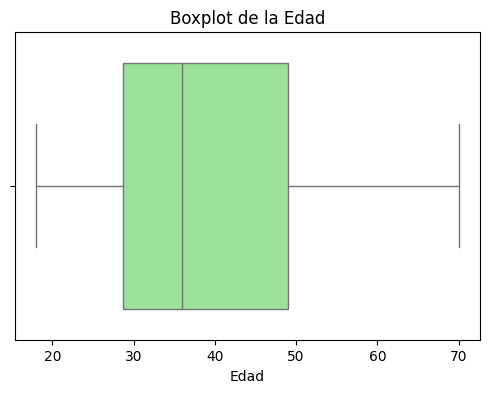

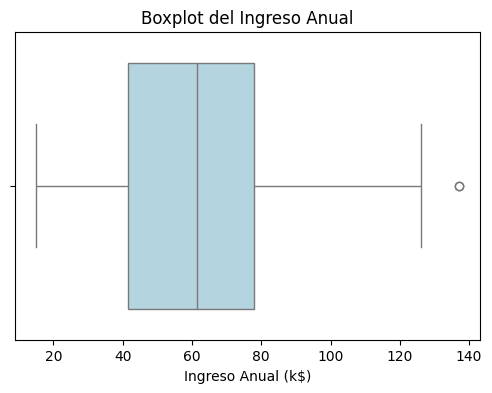

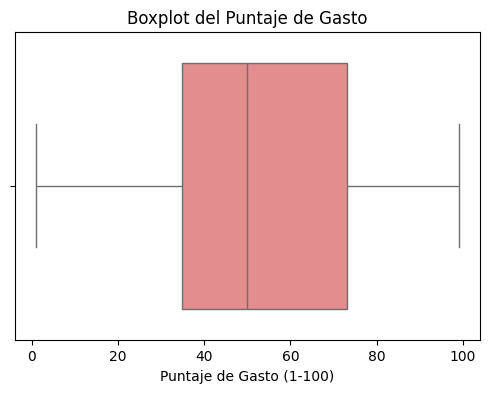

In [5]:
# Paso 1: Análisis exploratorio de los datos
# Ver las primeras filas del dataset
print("Primeras filas del dataset:")
display(data.head())

# Resumen estadístico del dataset
print("\nResumen estadístico:")
display(data.describe())

# ----- Análisis exploratorio -----

# 1. Distribución del género
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender', hue='Gender', palette='pastel', legend=False)
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

# 2. Distribución de la Edad
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='Age', kde=True, color='skyblue', bins=20)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# 3. Relación entre Ingreso Anual y Puntaje de Gasto
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='viridis')
plt.title('Relación entre Ingreso Anual y Puntaje de Gasto')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend(title='Género')
plt.show()

# 4. Boxplots para detectar valores atípicos

# Boxplot de la Edad
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Age', color='lightgreen')
plt.title('Boxplot de la Edad')
plt.xlabel('Edad')
plt.show()

# Boxplot del Ingreso Anual
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Annual Income (k$)', color='lightblue')
plt.title('Boxplot del Ingreso Anual')
plt.xlabel('Ingreso Anual (k$)')
plt.show()

# Boxplot del Puntaje de Gasto
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Spending Score (1-100)', color='lightcoral')
plt.title('Boxplot del Puntaje de Gasto')
plt.xlabel('Puntaje de Gasto (1-100)')
plt.show()

In [6]:
# Paso 2: Preprocesamiento de los datos

# 1. Verificar valores faltantes
print("Valores faltantes por columna:")
print(data.isnull().sum())

# 2. Verificar datos duplicados
print("\n¿Hay datos duplicados?")
print(data.duplicated().sum())

# 3. Eliminar columnas no relevantes para el análisis
# Eliminamos CustomerID porque no aporta información para el modelo
data = data.drop(columns=['CustomerID'])

# 4. Codificación de variables categóricas
# Convertimos la columna 'Gender' a valores numéricos
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Verificamos la transformación
print("\nDataset después de codificar la variable 'Gender':")
display(data.head())

# 5. Normalización de datos
from sklearn.preprocessing import MinMaxScaler

# Normalizamos las columnas numéricas (Age, Annual Income, Spending Score)
scaler = MinMaxScaler()
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(
    data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
)

# Verificamos los datos normalizados
print("\nDataset después de la normalización:")
display(data.head())

Valores faltantes por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

¿Hay datos duplicados?
0

Dataset después de codificar la variable 'Gender':


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40



Dataset después de la normalización:


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,0.019231,0.000000,0.387755
1,0,0.057692,0.000000,0.816327
2,1,0.038462,0.008197,0.051020
3,1,0.096154,0.008197,0.775510
4,1,0.250000,0.016393,0.397959


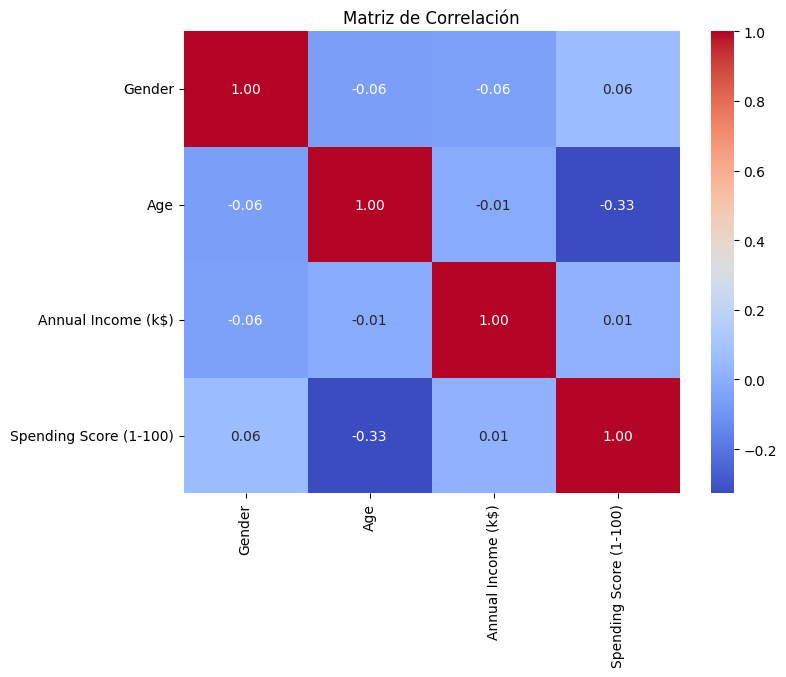


Correlaciones más fuertes con la variable 'Spending Score (1-100)':
Spending Score (1-100)    1.000000
Gender                    0.058109
Annual Income (k$)        0.009903
Age                      -0.327227
Name: Spending Score (1-100), dtype: float64

Características seleccionadas:
        Age  Annual Income (k$)  Spending Score (1-100)
0  0.019231            0.000000                0.387755
1  0.057692            0.000000                0.816327
2  0.038462            0.008197                0.051020
3  0.096154            0.008197                0.775510
4  0.250000            0.016393                0.397959


In [7]:
# Paso 3: Selección de características

# 1. Calcular la correlación entre las variables
correlation_matrix = data.corr()

# 2. Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Matriz de Correlación')
plt.show()

# 3. Analizar correlaciones significativas
print("\nCorrelaciones más fuertes con la variable 'Spending Score (1-100)':")
print(correlation_matrix['Spending Score (1-100)'].sort_values(ascending=False))

# 4. Selección de características
# Basándonos en la correlación, seleccionamos las variables más relevantes
selected_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[selected_features]

print("\nCaracterísticas seleccionadas:")
print(X.head())

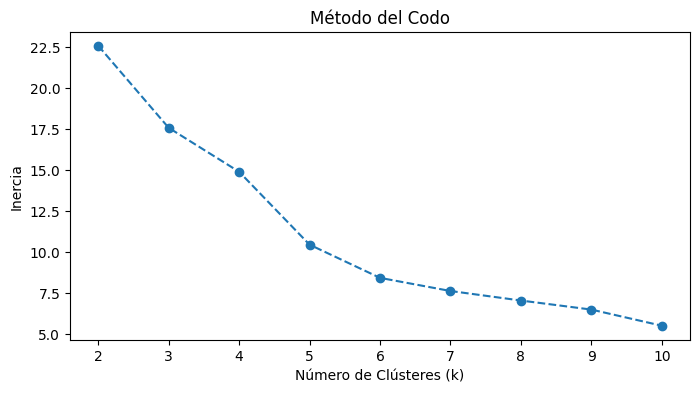

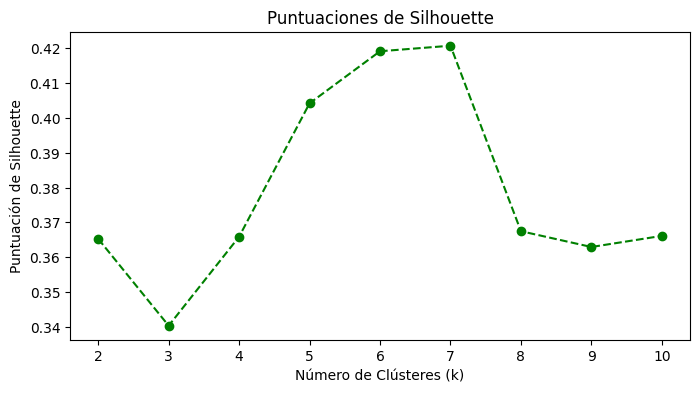

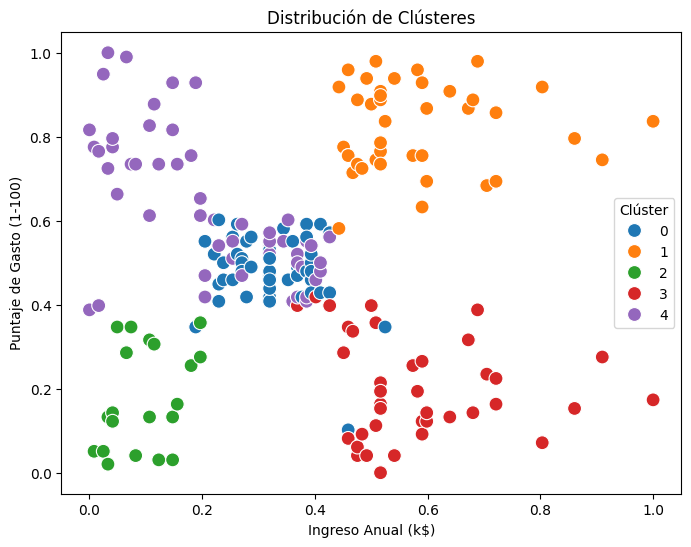


Dataset con los clústeres asignados:


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,0.019231,0.000000,0.387755,4
1,0,0.057692,0.000000,0.816327,4
2,1,0.038462,0.008197,0.051020,2
3,1,0.096154,0.008197,0.775510,4
4,1,0.250000,0.016393,0.397959,4


In [8]:
# Paso 4: Entrenamiento del modelo K-means

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Encontrar el número óptimo de clústeres usando el método del codo
inertia = []
silhouette_scores = []
range_clusters = range(2, 11)  # Probaremos entre 2 y 10 clústeres

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Visualizar el método del codo
plt.figure(figsize=(8, 4))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.xticks(range_clusters)
plt.show()

# Visualizar las puntuaciones de Silhouette
plt.figure(figsize=(8, 4))
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='--', color='green')
plt.title('Puntuaciones de Silhouette')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Puntuación de Silhouette')
plt.xticks(range_clusters)
plt.show()

# 2. Entrenar el modelo con el número óptimo de clústeres
# Suponemos que k=5 (ajustar según el resultado del codo)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Agregar las etiquetas al dataset
data['Cluster'] = kmeans.labels_

# Visualizar los clústeres generados (solo con las dos primeras características para graficar)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10', s=100)
plt.title('Distribución de Clústeres')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend(title='Clúster')
plt.show()

# Mostrar las primeras filas con los clústeres asignados
print("\nDataset con los clústeres asignados:")
display(data.head())

In [9]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# 1. Calcular el coeficiente de Silhouette
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Coeficiente de Silhouette: {silhouette_avg:.4f}")

# 2. Calcular el índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(X, kmeans.labels_)
print(f"Índice de Calinski-Harabasz: {calinski_harabasz:.4f}")

# 3. Interpretación
if silhouette_avg > 0.5:
    silhouette_quality = "buena"
elif silhouette_avg > 0.25:
    silhouette_quality = "moderada"
else:
    silhouette_quality = "baja"

print(f"\nInterpretación del coeficiente de Silhouette: La calidad de los clústeres es {silhouette_quality}.")

Coeficiente de Silhouette: 0.4042
Índice de Calinski-Harabasz: 125.9310

Interpretación del coeficiente de Silhouette: La calidad de los clústeres es moderada.



Resumen estadístico por clúster:


,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.553191,0.731588,0.324730,0.481980
1,0.550000,0.286058,0.582787,0.821684
2,0.600000,0.543269,0.096311,0.177041
3,0.512821,0.411243,0.580496,0.194924
4,0.592593,0.138177,0.213874,0.624906


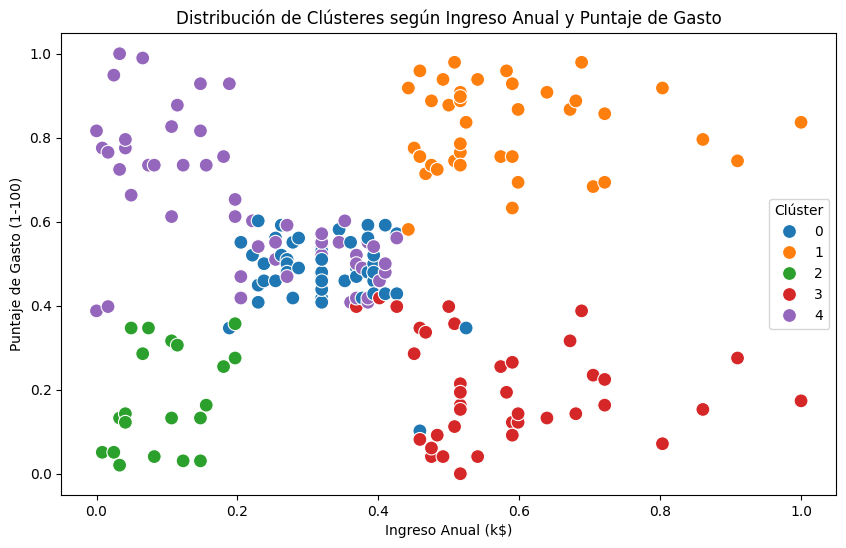

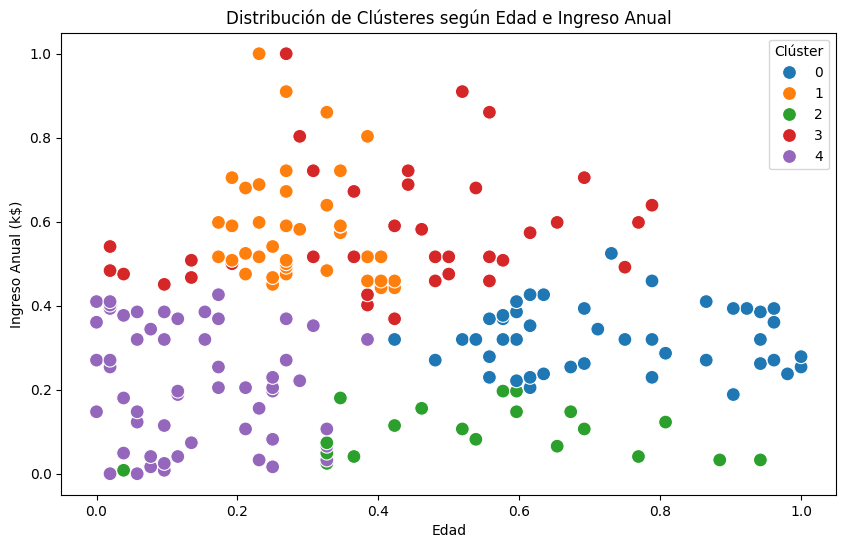


Cantidad de clientes por clúster:


Cluster
4    54
0    47
1    40
3    39
2    20
Name: count, dtype: int64

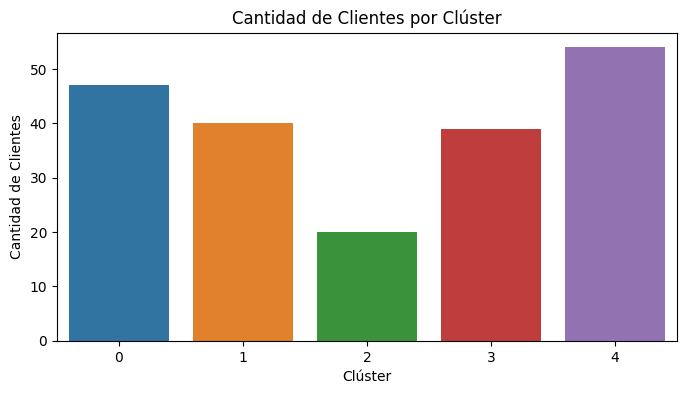

In [11]:
# Paso 6: Visualización de los resultados

# 1. Descripción de cada clúster (estadísticas descriptivas por clúster)
cluster_summary = data.groupby('Cluster').mean()

print("\nResumen estadístico por clúster:")
display(cluster_summary)

# 2. Visualización: Distribución de los clústeres en función de las características seleccionadas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10', s=100)
plt.title('Distribución de Clústeres según Ingreso Anual y Puntaje de Gasto')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend(title='Clúster')
plt.show()

# 3. Visualización adicional: Relación entre Edad e Ingreso Anual por Clúster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Annual Income (k$)', hue='Cluster', palette='tab10', s=100)
plt.title('Distribución de Clústeres según Edad e Ingreso Anual')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.legend(title='Clúster')
plt.show()

# 4. Conteo de clientes por clúster
cluster_counts = data['Cluster'].value_counts()

print("\nCantidad de clientes por clúster:")
display(cluster_counts)

# Gráfico de barras para el conteo de clientes
plt.figure(figsize=(8, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, dodge=False, palette='tab10', legend=False)
plt.title('Cantidad de Clientes por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Cantidad de Clientes')
plt.show()